ModSim project 1

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv
from math import exp

In [4]:
table = read_csv('data.csv',index_col=0);

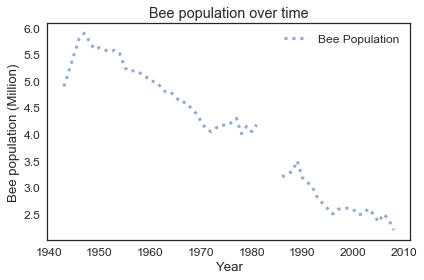

In [5]:

plot(table.Population,':', label='Bee Population')
decorate(xlabel='Year', 
             ylabel='Bee population (Million)',
             title='Bee population over time')

In [6]:
population = table.Population

Year
1943    4.90
1944    5.20
1945    5.50
1946    5.80
1947    5.90
1948    5.75
1949    5.60
1950    5.63
1951    5.59
1952    5.55
1953    5.58
1954    5.52
1955    5.25
1956    5.18
1957    5.20
1958    5.15
1959    5.10
1960    5.00
1961    4.99
1962    4.90
1963    4.80
1964    4.80
1965    4.70
1966    4.60
1967    4.60
1968    4.50
1969    4.40
1970    4.25
1971    4.10
1972    4.05
        ... 
1979    4.15
1980    4.05
1981    4.18
1982     NaN
1983     NaN
1984     NaN
1985     NaN
1986    3.20
1987    3.25
1988    3.30
1989    3.50
1990    3.18
1991    3.10
1992    3.00
1993    2.80
1994    2.70
1995    2.60
1996    2.50
1997    2.59
1998    2.60
1999    2.61
2000    2.59
2001    2.49
2002    2.50
2003    2.60
2004    2.50
2005    2.35
2006    2.50
2007    2.40
2008    2.20
Name: Population, Length: 66, dtype: float64

In [160]:
t_0 = 1947;
t_end = get_last_label(population);
p_0 = population[1947];
system = System(t_0=t_0, t_end=t_end, p_0=p_0, alpha = -0.01);

In [161]:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth


In [162]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [163]:
def plot_results(population, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
   
    plot(timeseries, color='gray', label='model')
    
    plot(population,':', label='Bee Population')
    decorate(xlabel='Year', 
             ylabel='Bee population (Million)',
             title='Bee population over time')

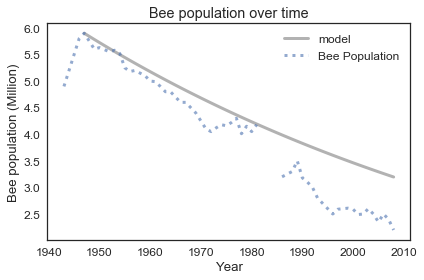

In [164]:
results = run_simulation(system, update_func2)
plot_results(population, results, 'Quadratic model')

Will bees go exticnt in the US?

Since 1947 the number of Honey Bees colonies have been decreasing. One of the posible reasons for this sudden decline could be the increased use of insecticides in agrigulture. Honey Bees are a main natural pollinator that farmers acknowledge as good, but are inadvertly the subjects of the toxic insecticides.

To explore this question we will develop a quadratic model that predicts the number of Honey Bee colonies in the United States.

Specifically, we will add one new feature to the model
1. Insecticide Usage: The current model doesn't account for the change in insectide usage. We will use this feature to more accurately predict the number of bee colonies.

We will begin our model with the data from 1947, which is when the number of colonies began to decrease.